In [1]:
from tm.optimizers import GeneticOptimizer, calculate_absolute_buy_and_hold_returns, StrategyPerformanceEvaluator
from tm.trading_rules import SimpleMovingAverage, ExponentialMovingAverage, STO, MACD, RSI
from tm import StockDataProvider
from tm.optimizers.utils import map_chromosome_to_trading_rule_parameters, filter_for_active_rules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
trading_rules = [SimpleMovingAverage, ExponentialMovingAverage, STO, MACD, RSI]

In [3]:
data = StockDataProvider('BMW.F', start='2008-01-01', end='2008-12-31')
g = GeneticOptimizer(data, trading_rules)

In [4]:
%%time
# Returns hall of fame of ngen // 4 best individuals
hof = g.run(ngen=50, hof_size=50 // 4)

gen	nevals	min     	max    	mean    	std    
0  	300   	-34.4846	5.42995	-8.85412	7.68995
1  	192   	-21.6447	5.42995	-2.74005	5.35351
2  	181   	-19.4728	5.55385	0.428477	3.98672
3  	183   	-20.5257	6.67902	2.06257 	3.47324
4  	168   	-16.2585	6.67902	3.05775 	4.12876
5  	183   	-20.4926	7.61827	3.882   	3.86643
6  	189   	-15.1632	7.61827	4.33177 	3.65191
7  	173   	-15.8338	7.61827	4.83213 	3.50774
8  	184   	-15.1632	8.4007 	4.91087 	4.03425
9  	181   	-15.9583	8.53023	5.00742 	4.59087
10 	187   	-15.6735	8.6299 	5.53097 	4.24015
11 	179   	-22.6852	9.08718	6.1918  	3.77071
12 	188   	-15.6935	9.08718	6.22832 	4.15382
13 	170   	-16.7861	9.2494 	6.79881 	4.05906
14 	175   	-19.8352	9.2494 	6.46817 	5.26759
15 	168   	-15.1632	9.2494 	7.33546 	4.12044
16 	188   	-15.5739	9.4274 	7.28859 	4.26739
17 	185   	-19.9997	9.4274 	7.37774 	4.40147
18 	171   	-18.7944	9.4274 	7.47486 	4.49936
19 	173   	-19.835 	9.4274 	7.67742 	4.45407
20 	185   	-15.1632	9.4274 	7.54068 	4.18439
21 	202   

In [5]:
for individual in hof:
    print('Chromosome:', individual)
    print('Parameter mapping:', map_chromosome_to_trading_rule_parameters(individual, trading_rules))
    print('Net profit for time period:', g.toolbox.evaluate(individual))
    print('----------------------------------------')

Chromosome: [0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0]
Parameter mapping: [[27], [199], [208], [13, 39, 23], [48, 105, 10]]
Net profit for time period: (10.12447499999996,)
----------------------------------------
Chromosome: [0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0]
Parameter mapping: [[27], [199], [208], [13, 39, 23], [48, 112, 10]]
Net profit for time period: (10.12447499999996,)
----------------------------------------
Chromosome: [0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0]
Parameter mapping: [[2

In [6]:
# Plot buy and sell signals of best strategy
best_strategy = hof[0]
rule_instances = list(map(lambda Rule, params: Rule(data, *params), trading_rules, map_chromosome_to_trading_rule_parameters(best_strategy, trading_rules)))
active_rule_instances = filter_for_active_rules(best_strategy, rule_instances)
evaluator = StrategyPerformanceEvaluator(active_rule_instances)
print('Net profit:', evaluator.calculate_net_profit_short())
buy_signals = evaluator.buy_signals
sell_signals = evaluator.sell_signals
print('Num of sell signals:', len(sell_signals[sell_signals == True]))
print('Num of buy signals:', len(buy_signals[buy_signals == True]))

Net profit: 35.988500000000066
Num of sell signals: 42
Num of buy signals: 41


/Users/nico/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


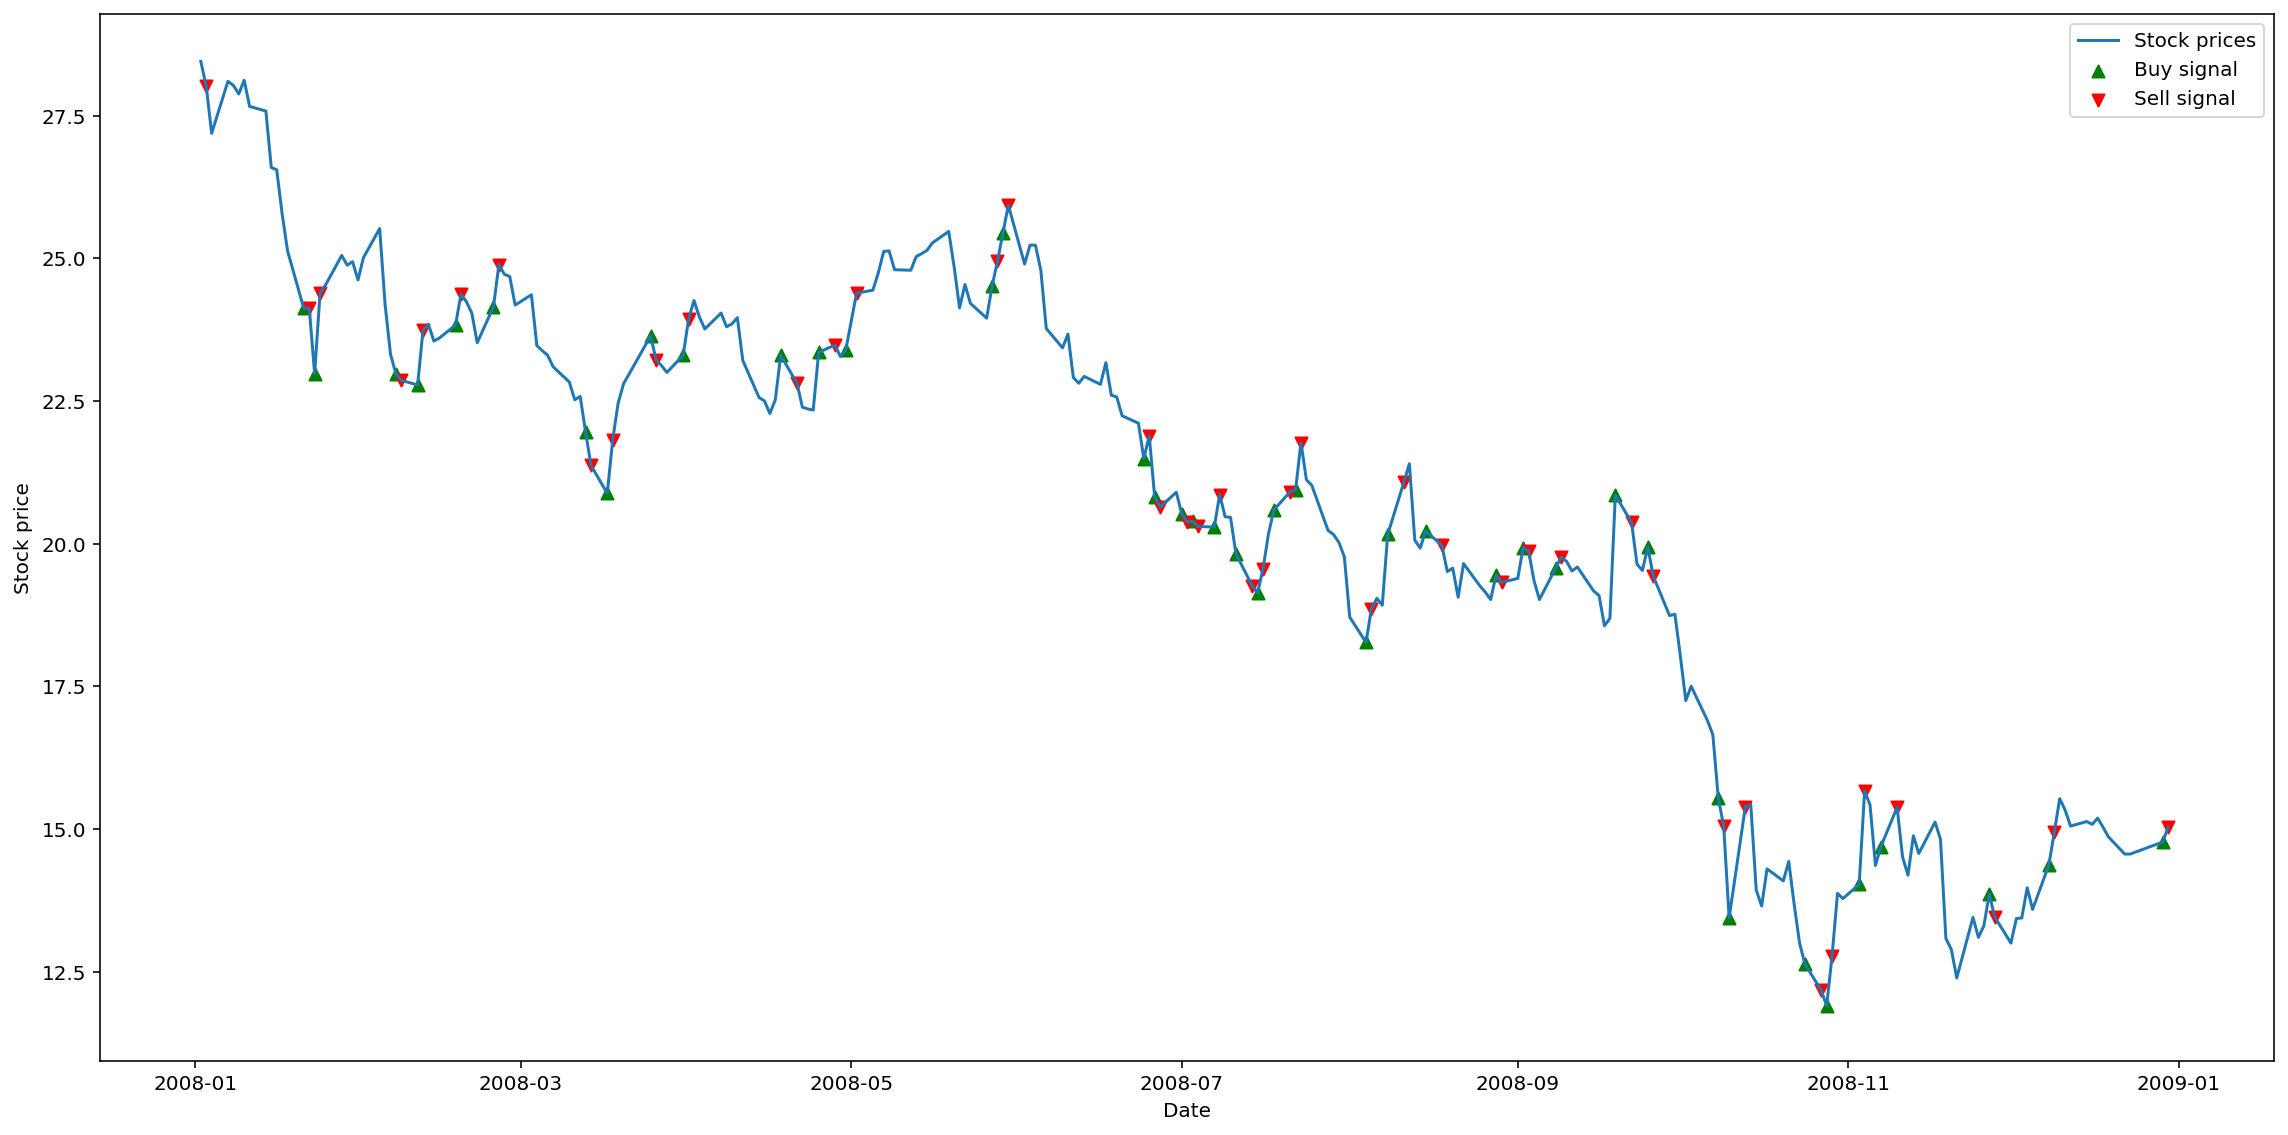

In [7]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(data.history['Close'], label='Stock prices')

buy_points = pd.Series(data=map(lambda index, price: price if buy_signals.loc[index] == True else np.nan, data.history['Close'].index, data.history['Close']),
                       index=data.history['Close'].index)
ax.scatter(x=buy_points.index, y=buy_points, color='green', marker='^', label='Buy signal')
sell_points = pd.Series(data=map(lambda index, price: price if sell_signals.loc[index] == True else np.nan, data.history['Close'].index, data.history['Close']),
                       index=data.history['Close'].index)
ax.scatter(x=sell_points.index, y=sell_points, color='red', marker='v', label='Sell signal')

ax.set_xlabel('Date')
ax.set_ylabel('Stock price')
ax.legend()
fig.tight_layout()

In [8]:
# Performance of buy and hold
calculate_absolute_buy_and_hold_returns(data)

-13.491125